<a href="https://colab.research.google.com/github/syedakulsumf18/CODSOFT/blob/main/codsoft_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING NECESSARY LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans

LOADING DATASET

In [ ]:
df=pd.read_csv('/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


PROCESSING DATASET

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

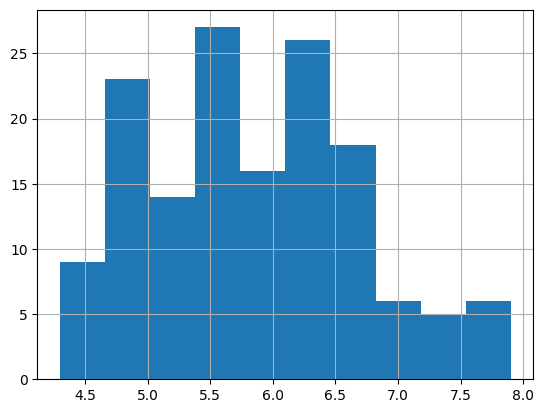

In [ ]:
df['sepal_length'].hist()

<Axes: >

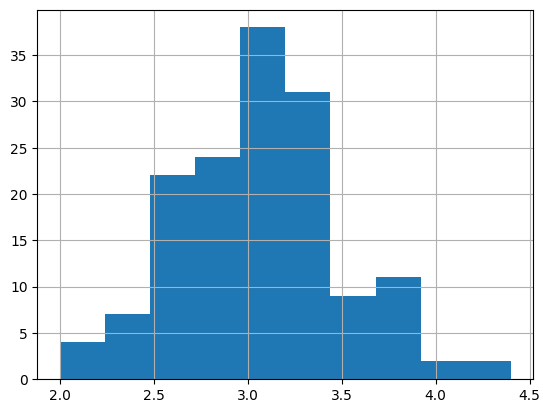

In [ ]:
df['sepal_width'].hist()

<Axes: >

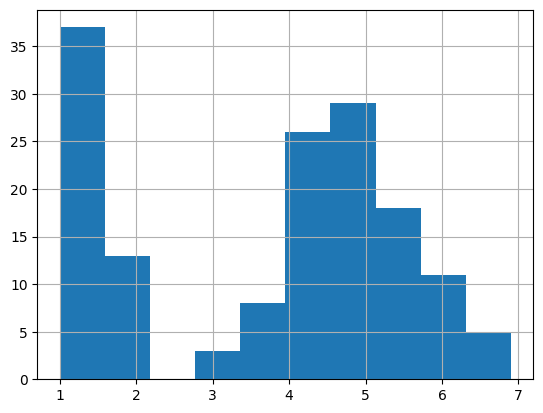

In [ ]:
df['petal_length'].hist()

<Axes: >

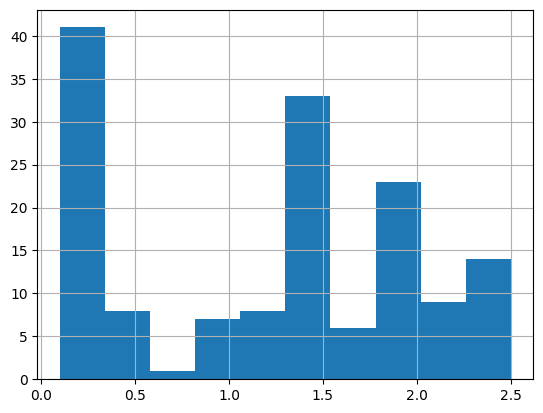

In [ ]:
df['petal_width'].hist()

In [ ]:
colors=['red','orange','blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

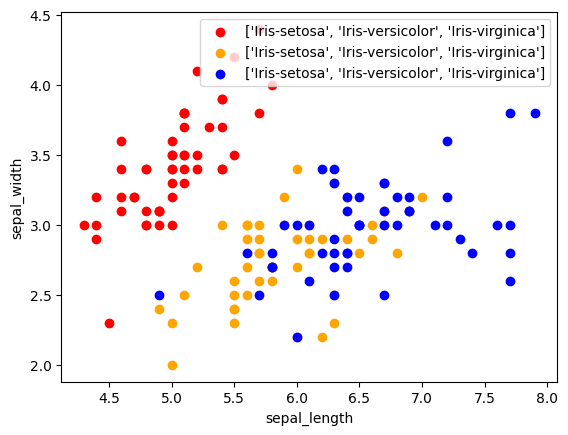

In [ ]:
for i in range(3):
  x=df[df['species']==species[i]]
  plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species)
  plt.xlabel("sepal_length")
  plt.ylabel("sepal_width")
  plt.legend()

In [ ]:
colors=['brown','yellow','blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

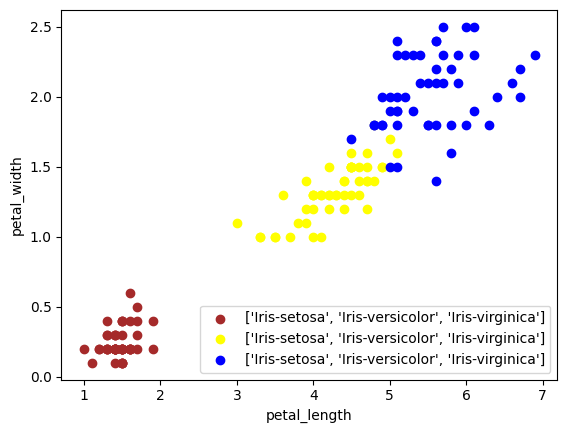

In [ ]:
for i in range(3):
  x=df[df['species']==species[i]]
  plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species)
  plt.xlabel("petal_length")
  plt.ylabel("petal_width")
  plt.legend()

In [ ]:
colors=['green','yellow','orange']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

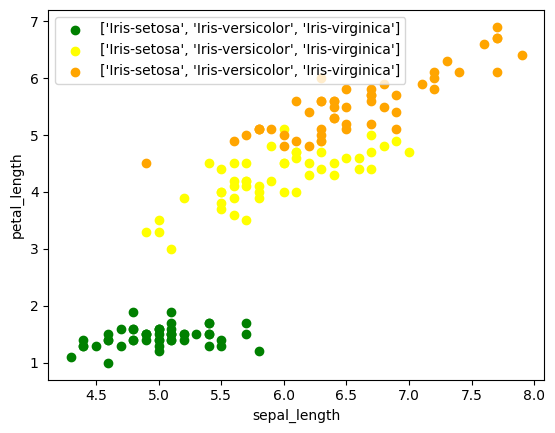

In [ ]:
for i in range(3):
  x=df[df['species']==species[i]]
  plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species)
  plt.xlabel("sepal_length")
  plt.ylabel("petal_length")
  plt.legend()

Correlation with Matrix

In [ ]:
# Drop the non-numeric column
numeric_df = df.drop(columns=['species'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()


In [ ]:
correlation_matrix.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.941225,0.975716,0.963204
sepal_width,-0.941225,1.000000,-0.992071,-0.994744
petal_length,0.975716,-0.992071,1.000000,0.997991
petal_width,0.963204,-0.994744,0.997991,1.000000


<Axes: >

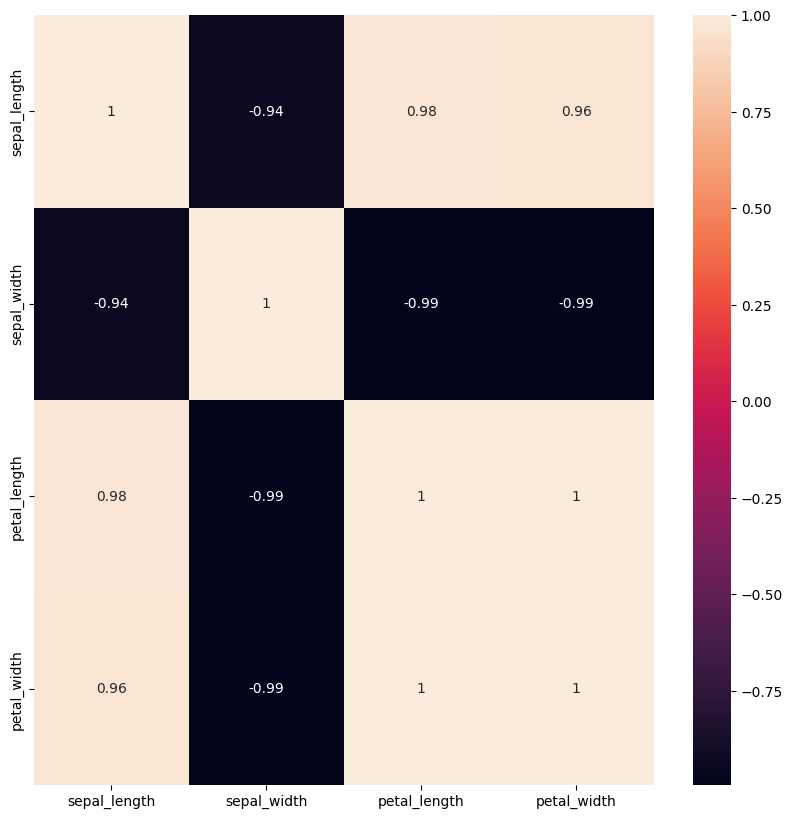

In [ ]:
corr=correlation_matrix.corr()
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True)

<Axes: >

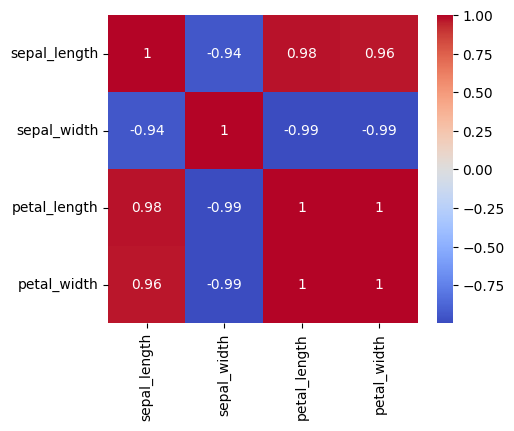

In [ ]:
corr=correlation_matrix.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df['species']=le.fit_transform(df['species'])

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


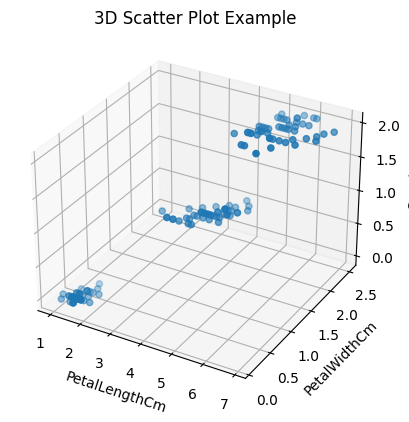

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.petal_length,df.petal_width,df.species)
ax.set_xlabel('PetalLengthCm')
ax.set_ylabel('PetalWidthCm')
ax.set_zlabel('Species')
plt.title('3D Scatter Plot Example')
plt.show()

thus 3-d plot gives us the glimpse of species of iris flower is more inclined towards the variables petal length and petal width

Applying KMean algorithm

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans


In [ ]:
km=KMeans(n_clusters=3,random_state=0,)
y_predicted=km.fit_predict(df[['petal_length','petal_width']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1


Accuracy measure

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(df.species,df.cluster)
cm

array([[50,  0,  0],
       [ 0,  2, 48],
       [ 0, 46,  4]])

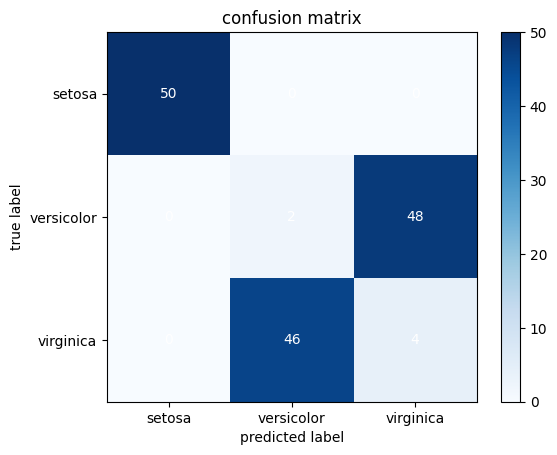

In [ ]:
true_labels=df.species
predicted_labels=df.cluster

cm=confusion_matrix(true_labels,predicted_labels)
class_labels=['setosa','versicolor','virginica']

#plot confusion matrix
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.title('confusion matrix')
plt.colorbar()
tick_marks=np.arange(len(class_labels))
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)

#fill matrix with values
for i in range(len(class_labels)):
  for j in range(len(class_labels)):
    plt.text(j,i,str(cm[i][j]), ha='center',va='center', color='white')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['species'])
y=df['species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print("accuracy",model.score(x_test,y_test)*100)

accuracy 97.77777777777777


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [ ]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
print("accuracy:",model.score(x_test,y_test)*100)

accuracy: 97.77777777777777


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [ ]:
model.fit(x_train,y_train)


DecisionTreeClassifier()

In [ ]:
print("accuracy:",model.score(x_test,y_test)*100)

accuracy: 97.77777777777777
